### Imports
Event accumulator to fetch data from a saved checkpoint file

In [1]:
from tensorflow.tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
event_file = 'train/log0'
eacc = EventAccumulator(event_file)
eacc.Reload()
eacc.Tags()

INFO:tensorflow:No path found after train/log0/events.out.tfevents.1505601456.Alexs-MacBook-Pro.local


{'audio': [],
 'compressedHistograms': [],
 'graph': True,
 'histograms': [],
 'images': [],
 'meta_graph': True,
 'run_metadata': [],
 'scalars': ['Input_pipeline/input_producer/fraction_of_32_full',
  'train/error_summary'],
 'tensors': ['XOR_model/hidden_layer/biases/tensor_summary',
  'XOR_model/hidden_layer/weights/tensor_summary',
  'XOR_model/output_layer/net_input/tensor_summary',
  'XOR_model/output_layer/weights/tensor_summary',
  'XOR_model/hidden_layer/activations/tensor_summary',
  'XOR_model/output_layer/biases/tensor_summary',
  'XOR_model/hidden_layer/net_input/tensor_summary',
  'XOR_model/output_layer/activations/tensor_summary']}

<IPython.core.display.Javascript object>


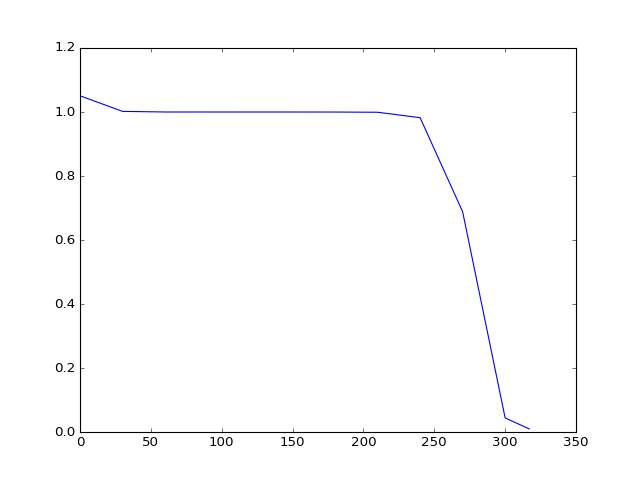

0
30
60
90
120
150
180
210
240
270
300
317


In [6]:
lc = np.stack(
  [np.asarray([scalar.step, scalar.value]) for scalar in eacc.Scalars('train/error_summary')])
plt.plot(lc[:,0],lc[:,1])
for scalar in eacc.Scalars('train/error_summary'):
    print(scalar.step)

In [4]:
np.set_printoptions(precision=3)

model_name = 'XOR_model'
layer_name = 'output_layer'
data_type = np.float32
for tt in eacc.Tags()['tensors']:
    fetch = '/'.join([model_name, layer_name])
    if fetch in tt:
        print(tt)
        for te in eacc.Tensors(tt):
            shape = [i.size for i in te.tensor_proto.tensor_shape.dim]
            binary_tensor = te.tensor_proto.tensor_content
            deci_tensor  = np.fromstring(binary_tensor, dtype=np.float32).reshape(shape)
            print('training step: {}\n tensor shape: {}\n{}\n'.format(te.step, shape, deci_tensor))

XOR_model/output_layer/net_input/tensor_summary
training step: 0
 tensor shape: [4, 1]
[[ 0.429]
 [ 0.46 ]
 [ 0.458]
 [ 0.488]]

training step: 30
 tensor shape: [4, 1]
[[ 0.076]
 [ 0.088]
 [ 0.088]
 [ 0.1  ]]

training step: 60
 tensor shape: [4, 1]
[[ 0.003]
 [ 0.009]
 [ 0.009]
 [ 0.014]]

training step: 90
 tensor shape: [4, 1]
[[-0.004]
 [-0.001]
 [-0.001]
 [ 0.002]]

training step: 120
 tensor shape: [4, 1]
[[-0.004]
 [-0.001]
 [-0.   ]
 [ 0.002]]

training step: 150
 tensor shape: [4, 1]
[[-0.005]
 [-0.001]
 [ 0.   ]
 [ 0.004]]

training step: 240
 tensor shape: [4, 1]
[[-0.141]
 [ 0.019]
 [ 0.019]
 [ 0.099]]

training step: 270
 tensor shape: [4, 1]
[[-1.886]
 [ 0.557]
 [ 0.56 ]
 [ 0.564]]

training step: 300
 tensor shape: [4, 1]
[[-2.394]
 [ 2.101]
 [ 2.098]
 [-2.045]]

training step: 317
 tensor shape: [4, 1]
[[-2.953]
 [ 2.93 ]
 [ 2.931]
 [-3.038]]

XOR_model/output_layer/weights/tensor_summary
training step: 0
 tensor shape: [2, 1]
[[ 0.272]
 [ 0.082]]

training step: 30
 t

In [5]:
np.set_printoptions(precision=3)
print(np.around(lc,2))

[[  0.000e+00   1.050e+00]
 [  3.000e+01   1.000e+00]
 [  6.000e+01   1.000e+00]
 [  9.000e+01   1.000e+00]
 [  1.200e+02   1.000e+00]
 [  1.500e+02   1.000e+00]
 [  1.800e+02   1.000e+00]
 [  2.100e+02   1.000e+00]
 [  2.400e+02   9.800e-01]
 [  2.700e+02   6.900e-01]
 [  3.000e+02   4.000e-02]
 [  3.170e+02   1.000e-02]]
